## Bike Sharing Problem Solution using MLR

### Problem Statement
    You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Read and prepare the data

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the csv
df = pd.read_csv('day.csv')

In [3]:
#Inspecting the dataset
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
#Shape of the dataframe
df.shape

(730, 16)

In [5]:
#Dropping the dependent variables casual and registered
df = df.drop(columns=['casual', 'registered'], axis=1)
#Dropping the independent variables instant and dteday
df = df.drop(columns=['instant', 'dteday'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Visualising the numeric variables

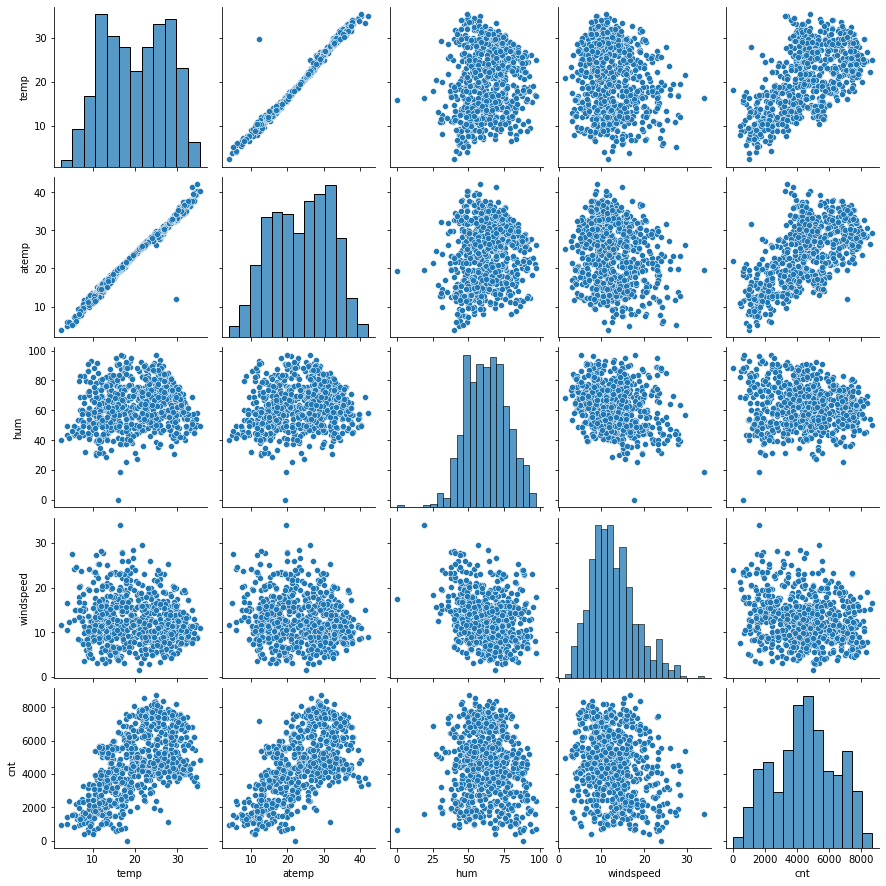

In [6]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
#Let's visualise the numeric variables
sns.pairplot(df[num_vars])
plt.show()

### Visualising the categorical variables

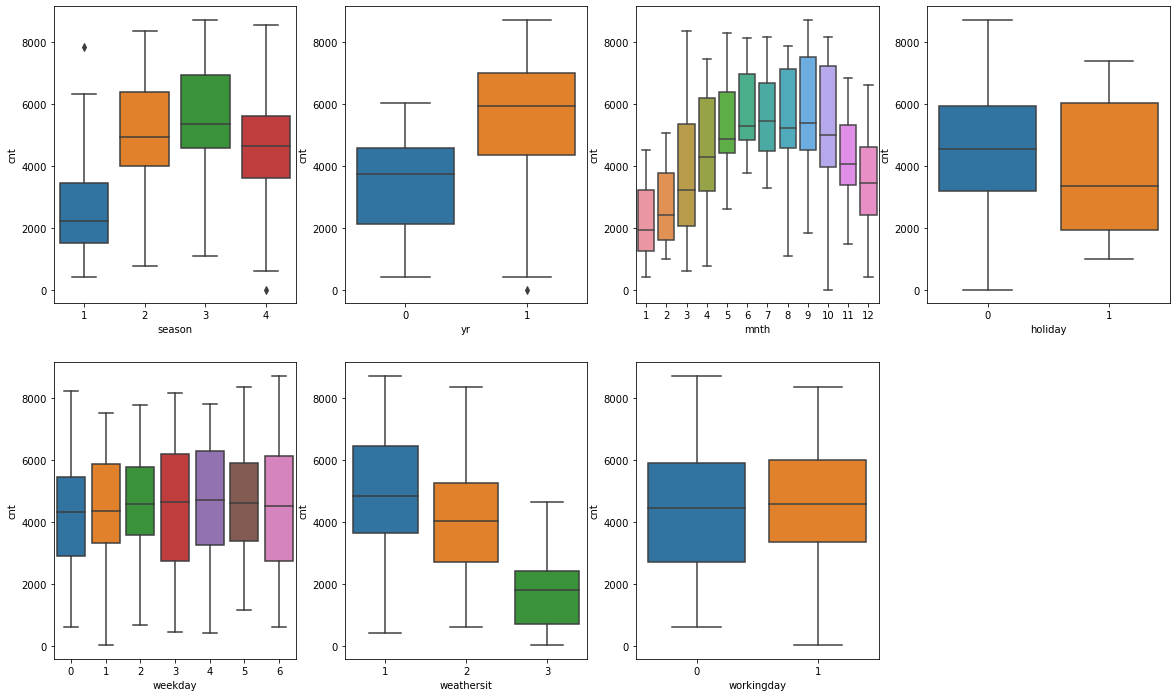

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

### Spltting data into train and test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### One hot encoding model to fit train and test data

In [10]:
print(df_train['season'].value_counts())
print(df_train['yr'].value_counts())
print(df_train['mnth'].value_counts())
print(df_train['holiday'].value_counts())
print(df_train['weekday'].value_counts())
print(df_train['weathersit'].value_counts())
print(df_train['workingday'].value_counts())

3    134
4    127
2    125
1    124
Name: season, dtype: int64
1    259
0    251
Name: yr, dtype: int64
3     50
8     49
1     45
11    44
10    44
12    43
5     43
9     41
4     40
7     39
6     38
2     34
Name: mnth, dtype: int64
0    497
1     13
Name: holiday, dtype: int64
3    81
6    79
1    77
0    73
4    68
2    67
5    65
Name: weekday, dtype: int64
1    320
2    175
3     15
Name: weathersit, dtype: int64
1    345
0    165
Name: workingday, dtype: int64


In [11]:
#Converting the categorical variables from integers to strings
df_train.loc[:, 'season'] = df_train['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# df_train.loc[:, 'yr'] = df_train['yr'].map({0:'2018', 1:'2019'})
df_train.loc[:, 'mnth'] = df_train['mnth'].map({
    1:'jan',
    2:'feb',
    3:'mar',
    4:'apr',
    5:'may',
    6:'jun',
    7:'jul',
    8:'aug',
    9:'sep',
    10:'oct',
    11:'nov',
    12:'dec'
})
# df_train.loc[:, 'holiday'] = df_train['holiday'].map({0:'notholiday', 1:'holiday'})
df_train.loc[:, 'weekday'] = df_train['weekday'].map({
    0:'tue',
    1:'wed',
    2:'thu',
    3:'fri',
    4:'sat',
    5:'sun',
    6:'mon'
})
df_train.loc[:, 'weathersit'] = df_train['weathersit'].map({1:'clear', 2:'mist', 3:'light snow', 4:'heavy snow'})
# df_train.loc[:, 'workingday'] = df_train['workingday'].map({1:'workingday', 0: 'holidayorweekend'})

C:\Users\91949\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
#One hot encoding a model
enc = OneHotEncoder(handle_unknown='error', drop='first')
# enc = OneHotEncoder(handle_unknown='error')
#categorical variables columns
# cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'workingday']
cat_var = ['season', 'mnth', 'weekday', 'weathersit']
#fitting the train dataset
enc.fit(df_train[cat_var])

OneHotEncoder(drop='first')

In [14]:
#transforming the train dataset to one hot model
cat_enc = enc.transform(df_train[cat_var]).toarray()
cat_enc_df = pd.DataFrame(cat_enc, columns=enc.get_feature_names())
# cat_enc_df = pd.get_dummies(df_train[cat_var])
cat_enc_df.head()

,x0_spring,x0_summer,x0_winter,x1_aug,x1_dec,x1_feb,x1_jan,x1_jul,x1_jun,x1_mar,...,x1_oct,x1_sep,x2_mon,x2_sat,x2_sun,x2_thu,x2_tue,x2_wed,x3_light snow,x3_mist
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
#resetting the index before concat
df_train.reset_index(inplace=True)
cat_enc_df.reset_index(inplace=True)
#concatenating the transformed data with the train data
df_train = pd.concat([df_train, cat_enc_df], axis = 1)
df_train = df_train.drop(columns='index', axis=1)
#dropping the columns having categorical values
df_train = df_train.drop(columns=cat_var, axis=1)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,x0_spring,x0_summer,...,x1_oct,x1_sep,x2_mon,x2_sat,x2_sun,x2_thu,x2_tue,x2_wed,x3_light snow,x3_mist
0,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Scaling model to rescale features of train and test data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
#Initialising the scaler class
scaler = MinMaxScaler()
#continuos variables other than one hot encoded
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
#fit the scaler to the train dataset
scaler.fit(df_train[num_vars])

MinMaxScaler()

In [18]:
#transform the continuos vars between 0 and 1
df_train[num_vars] = scaler.transform(df_train[num_vars])
df_train[num_vars].head()

,temp,atemp,hum,windspeed,cnt
0,0.509887,0.501133,0.575354,0.300794,0.864243
1,0.815169,0.766351,0.725633,0.264686,0.827658
2,0.442393,0.438975,0.640189,0.255342,0.465255
3,0.245101,0.200348,0.498067,0.663106,0.204096
4,0.395666,0.391735,0.504508,0.188475,0.482973


In [19]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,x0_spring,x0_summer,...,x1_oct,x1_sep,x2_mon,x2_sat,x2_sun,x2_thu,x2_tue,x2_wed,x3_light snow,x3_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


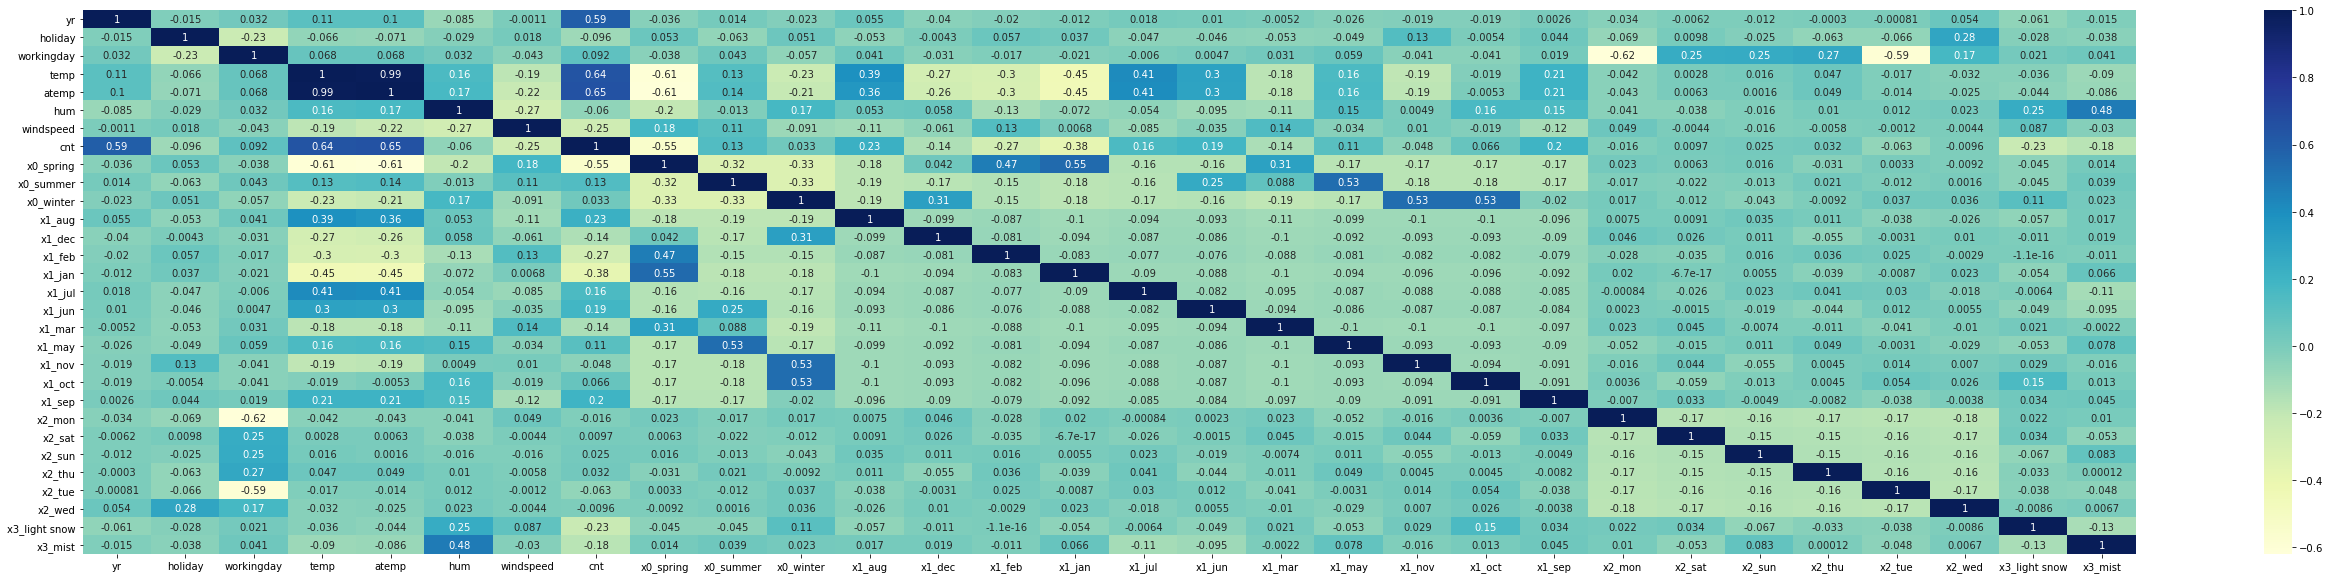

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (46, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In first glance we notice that `cnt` has the highest positive correlation with `temp` and `atemp`, but `temp` and `atemp` are highly correlated as we expected, also `windspeed` has a significant negative correlation with `cnt`.

In [21]:
#dropping temp as atemp and temp are highly correlated
# df_train = df_train.drop(columns='temp', axis = 1)

### Dividing into X and Y sets for the model building

In [22]:
#Let's split training dataset to dependent and independent variables
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


### RFE
Recursive feature elimination

In [23]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\91949\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('x0_spring', True, 1),
 ('x0_summer', True, 1),
 ('x0_winter', True, 1),
 ('x1_aug', False, 15),
 ('x1_dec', False, 4),
 ('x1_feb', False, 5),
 ('x1_jan', False, 2),
 ('x1_jul', True, 1),
 ('x1_jun', False, 10),
 ('x1_mar', False, 13),
 ('x1_may', False, 7),
 ('x1_nov', False, 3),
 ('x1_oct', False, 14),
 ('x1_sep', True, 1),
 ('x2_mon', True, 1),
 ('x2_sat', False, 12),
 ('x2_sun', False, 11),
 ('x2_thu', False, 9),
 ('x2_tue', True, 1),
 ('x2_wed', False, 8),
 ('x3_light snow', True, 1),
 ('x3_mist', True, 1)]

In [26]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'x0_spring',
       'x0_summer', 'x0_winter', 'x1_jul', 'x1_sep', 'x2_mon', 'x2_tue',
       'x3_light snow', 'x3_mist'],
      dtype='object')

This is an interesting observation I believed looking at the correlation graph that atemp, and windspeed affected the count, but these features have the least rank. Let's go ahead and build a model and examine further.

### Building model using statsmodel, for the detailed statistics

In [27]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [28]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [29]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [30]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          1.13e-191
Time:                        20:16:13   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1989      0.028      7.181

In [31]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\91949\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\91949\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,holiday,inf
3,workingday,inf
12,x2_mon,inf
13,x2_tue,inf
7,x0_spring,5.02
4,temp,3.62
9,x0_winter,3.49
8,x0_summer,2.61
5,hum,1.91
15,x3_mist,1.57


In [33]:
#dropping holiday
X_train_rfe = X_train_rfe.drop(columns='holiday', axis=1)

In [34]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,114.08
2,workingday,9.07
11,x2_mon,6.06
12,x2_tue,5.74
6,x0_spring,5.02
3,temp,3.62
8,x0_winter,3.49
7,x0_summer,2.61
4,hum,1.91
14,x3_mist,1.57


In [35]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [36]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          1.13e-191
Time:                        20:16:13   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1799      0.042      4.276

In [37]:
#dropping x2_tue
X_train_rfe = X_train_rfe.drop(columns='x2_tue', axis=1)

In [38]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.13
6,x0_spring,5.02
3,temp,3.62
8,x0_winter,3.49
7,x0_summer,2.61
4,hum,1.91
2,workingday,1.65
11,x2_mon,1.64
13,x3_mist,1.57
9,x1_jul,1.49


In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          8.51e-192
Time:                        20:16:14   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2298      0.036      6.451

In [40]:
#dropping x0_spring
X_train_rfe = X_train_rfe.drop(columns='x0_spring', axis=1)

In [41]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.12
4,hum,1.89
2,workingday,1.65
10,x2_mon,1.64
3,temp,1.60
12,x3_mist,1.56
8,x1_jul,1.43
6,x0_summer,1.33
7,x0_winter,1.29
11,x3_light snow,1.24


In [42]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          2.26e-191
Time:                        20:16:14   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1705      0.028      5.991

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [43]:
y_train_cnt = lm.predict(X_train_rfe)

C:\Users\91949\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

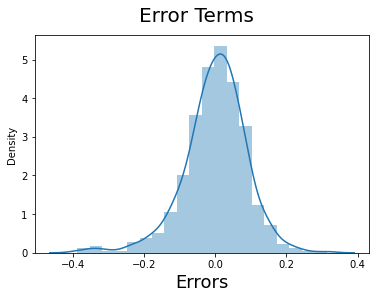

In [44]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

We can see a nice tight normal distribution for the error terms.

### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [45]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-45-f3a36cc29a9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
C:\Users\91949\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [46]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2.456621,0.479452,6.474886,0.036530,3.018265,0.698630,1.374429,0.558941,0.532991,0.638508,0.313350,0.520592
std,1.109463,0.500722,3.421875,0.188034,1.988415,0.459904,0.538843,0.233698,0.217888,0.148974,0.159947,0.218435
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### One hot encoding the test data

In [47]:
df_test['weathersit'].value_counts()

1    143
2     70
3      6
Name: weathersit, dtype: int64

In [48]:
#Converting the categorical variables from integers to strings
df_test.loc[:, 'season'] = df_test['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# df_test.loc[:, 'yr'] = df_test['yr'].map({0:'2018', 1:'2019'})
df_test.loc[:, 'mnth'] = df_test['mnth'].map({
    1:'jan',
    2:'feb',
    3:'mar',
    4:'apr',
    5:'may',
    6:'jun',
    7:'jul',
    8:'aug',
    9:'sep',
    10:'oct',
    11:'nov',
    12:'dec'
})
# df_test.loc[:, 'holiday'] = df_test['holiday'].map({0:'notholiday', 1:'holiday'})
df_test.loc[:, 'weekday'] = df_test['weekday'].map({
    0:'tue',
    1:'wed',
    2:'thu',
    3:'fri',
    4:'sat',
    5:'sun',
    6:'mon'
})
df_test.loc[:, 'weathersit'] = df_test['weathersit'].map({1:'clear', 2:'mist', 3:'light snow', 4:'heavy snow'})
# df_test.loc[:, 'workingday'] = df_test['workingday'].map({1:'workingday', 0: 'holidayorweekend'})

C:\Users\91949\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [49]:
#transforming the test dataset to one hot model
cat_enc = enc.transform(df_test[cat_var]).toarray()
cat_enc_df = pd.DataFrame(cat_enc, columns=enc.get_feature_names())
# cat_enc_df = pd.get_dummies(df_test[cat_var])
cat_enc_df.head()

,x0_spring,x0_summer,x0_winter,x1_aug,x1_dec,x1_feb,x1_jan,x1_jul,x1_jun,x1_mar,...,x1_oct,x1_sep,x2_mon,x2_sat,x2_sun,x2_thu,x2_tue,x2_wed,x3_light snow,x3_mist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#resetting the index before concat
df_test.reset_index(inplace=True)
cat_enc_df.reset_index(inplace=True)
#concatenating the transformed data with the train data
df_test = pd.concat([df_test, cat_enc_df], axis = 1)
df_test = df_test.drop(columns='index', axis=1)
#dropping the columns having categorical values
df_test = df_test.drop(columns=cat_var, axis=1)
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,x0_spring,x0_summer,...,x1_oct,x1_sep,x2_mon,x2_sat,x2_sun,x2_thu,x2_tue,x2_wed,x3_light snow,x3_mist
0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Dividing into X_test and y_test

In [51]:
y_test = df_test.pop('cnt')
X_test = df_test

In [52]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [53]:
X_test_new = X_test[X_train_new.columns]

In [54]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test_new)

In [55]:
# Making predictions using the model

y_pred_lm = lm.predict(X_test_lm)

### Model Evaluation

Text(0, 0.5, 'y_pred')

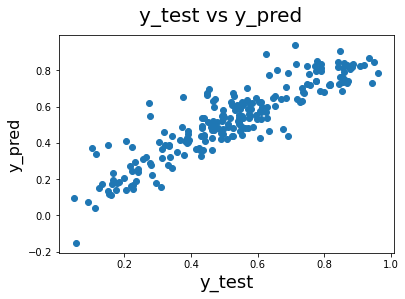

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see a linear relation between the actual and predicted datasets. So our model is able to predict the count for a given dataset.
The equation goes as 
`cnt = 0.1705 + 0.2286 * yr + 0.0527 * workingday + 0.5960 * temp - 0.1693 * hum - 0.1885 * windspeed + 0.0815 * x0_summer + 0.1365 * x0_winter - 0.0442 * x1_jul + 0.0926 * x1_sep + 0.0627 * x2_mon - 0.2404 * x3_light snow - 0.0551 * x3_mist`